In [275]:
import polars as ps # type: ignore
import matplotlib.pyplot as plt # type: ignore
import numpy as np # type: ignore


In [276]:
df_cards = ps.read_csv('../data/cards_data.csv')

In [277]:
df_cards.head()

id,client_id,card_brand,card_type,card_number,expires,cvv,has_chip,num_cards_issued,credit_limit,acct_open_date,year_pin_last_changed,card_on_dark_web
i64,i64,str,str,i64,str,i64,str,i64,str,str,i64,str
4524,825,"""Visa""","""Debit""",4344676511950444,"""12/2022""",623,"""YES""",2,"""$24295""","""09/2002""",2008,"""No"""
2731,825,"""Visa""","""Debit""",4956965974959986,"""12/2020""",393,"""YES""",2,"""$21968""","""04/2014""",2014,"""No"""
3701,825,"""Visa""","""Debit""",4582313478255491,"""02/2024""",719,"""YES""",2,"""$46414""","""07/2003""",2004,"""No"""
42,825,"""Visa""","""Credit""",4879494103069057,"""08/2024""",693,"""NO""",1,"""$12400""","""01/2003""",2012,"""No"""
4659,825,"""Mastercard""","""Debit (Prepaid)""",5722874738736011,"""03/2009""",75,"""YES""",1,"""$28""","""09/2008""",2009,"""No"""


In [278]:
# Convert the 'credit_limit' column to numeric by removing dollar signs and commas
df_cards = df_cards.with_columns(
    ps.col('credit_limit')
    .str.replace(r'[\$,]', '', literal=False)  # Remove dollar signs and commas
    .cast(ps.Float64)  # Convert the cleaned string to a float
)

In [279]:
df_cards = df_cards.with_columns(
   ps.col("acct_open_date")
   .str.strptime(ps.Date, format="%m/%Y")
   .alias("acct_open_date")
)


In [280]:
df_cards.head() 

id,client_id,card_brand,card_type,card_number,expires,cvv,has_chip,num_cards_issued,credit_limit,acct_open_date,year_pin_last_changed,card_on_dark_web
i64,i64,str,str,i64,str,i64,str,i64,f64,date,i64,str
4524,825,"""Visa""","""Debit""",4344676511950444,"""12/2022""",623,"""YES""",2,24295.0,2002-09-01,2008,"""No"""
2731,825,"""Visa""","""Debit""",4956965974959986,"""12/2020""",393,"""YES""",2,21968.0,2014-04-01,2014,"""No"""
3701,825,"""Visa""","""Debit""",4582313478255491,"""02/2024""",719,"""YES""",2,46414.0,2003-07-01,2004,"""No"""
42,825,"""Visa""","""Credit""",4879494103069057,"""08/2024""",693,"""NO""",1,12400.0,2003-01-01,2012,"""No"""
4659,825,"""Mastercard""","""Debit (Prepaid)""",5722874738736011,"""03/2009""",75,"""YES""",1,28.0,2008-09-01,2009,"""No"""


In [281]:
# Select string columns
string_columns = df_cards.select(ps.selectors.string()).columns

# Iterate over string columns and print the number of unique values
for col in string_columns:
    unique_count = df_cards[col].n_unique()
    print(f"{col}: {unique_count} unique values")

card_brand: 4 unique values
card_type: 3 unique values
expires: 259 unique values
has_chip: 2 unique values
card_on_dark_web: 1 unique values


### Here surprisingly we have only one value for card_on_dark_web

In [282]:
df_cards.filter(ps.col('card_on_dark_web') == 'Yes')

id,client_id,card_brand,card_type,card_number,expires,cvv,has_chip,num_cards_issued,credit_limit,acct_open_date,year_pin_last_changed,card_on_dark_web
i64,i64,str,str,i64,str,i64,str,i64,f64,date,i64,str


- since no records found we delete this column  

In [283]:
df_cards.drop_in_place('card_on_dark_web')

card_on_dark_web
str
"""No"""
"""No"""
"""No"""
"""No"""
"""No"""
…
"""No"""
"""No"""
"""No"""


In [284]:
df_cards.head()

id,client_id,card_brand,card_type,card_number,expires,cvv,has_chip,num_cards_issued,credit_limit,acct_open_date,year_pin_last_changed
i64,i64,str,str,i64,str,i64,str,i64,f64,date,i64
4524,825,"""Visa""","""Debit""",4344676511950444,"""12/2022""",623,"""YES""",2,24295.0,2002-09-01,2008
2731,825,"""Visa""","""Debit""",4956965974959986,"""12/2020""",393,"""YES""",2,21968.0,2014-04-01,2014
3701,825,"""Visa""","""Debit""",4582313478255491,"""02/2024""",719,"""YES""",2,46414.0,2003-07-01,2004
42,825,"""Visa""","""Credit""",4879494103069057,"""08/2024""",693,"""NO""",1,12400.0,2003-01-01,2012
4659,825,"""Mastercard""","""Debit (Prepaid)""",5722874738736011,"""03/2009""",75,"""YES""",1,28.0,2008-09-01,2009


### **Graphical Analysis**

1. **Histogram of Card Brands**  
   - Number of users for each **card brand** (Visa, Mastercard, etc.).
   - Subdivide the histogram by **card_type** (Credit, Debit, Prepaid).

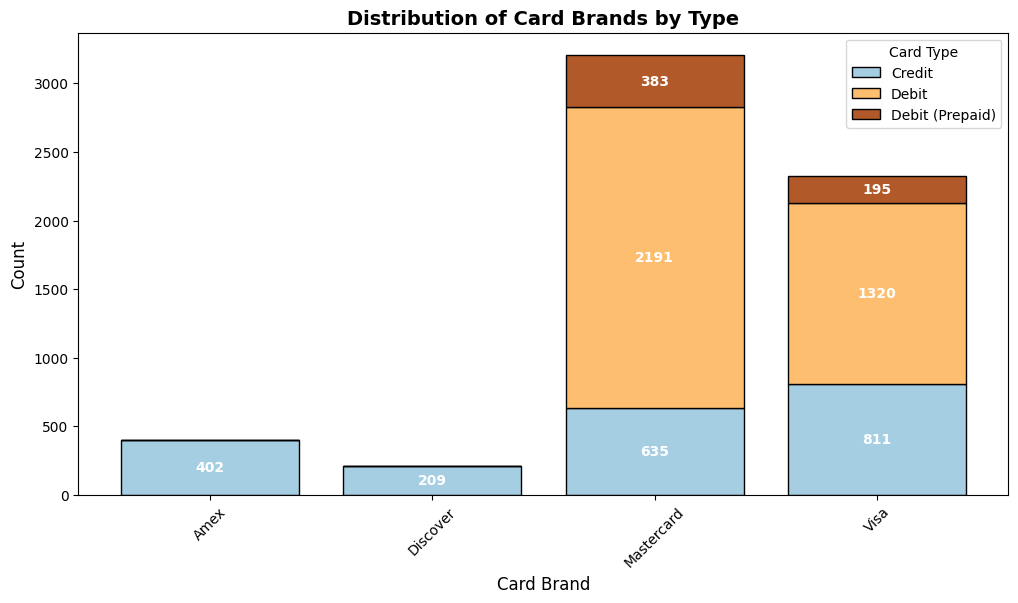

In [285]:
# Count occurrences of each card brand and card type correctly
card_counts = (
    df_cards
    .group_by(["card_brand", "card_type"])
    .agg(ps.len().alias("count"))
)

# Convert to lists for consistent ordering
brand_labels = sorted(card_counts["card_brand"].unique().to_list())  
type_labels = sorted(card_counts["card_type"].unique().to_list())  

# Create a dictionary to store counts for each (brand, type) pair
brand_type_counts = {brand: {card_type: 0 for card_type in type_labels} for brand in brand_labels}

for row in card_counts.iter_rows(named=True):
    brand_type_counts[row["card_brand"]][row["card_type"]] = row["count"]

# Convert to a NumPy array for stacked plotting
data_matrix = np.array([[brand_type_counts[brand].get(card_type, 0) for card_type in type_labels] for brand in brand_labels])

# Define colors for different card types
colors = plt.cm.Paired(np.linspace(0, 1, len(type_labels)))  

# Plot the stacked bar chart
fig, ax = plt.subplots(figsize=(12, 6))
bottom = np.zeros(len(brand_labels))

bars = []
for i, card_type in enumerate(type_labels):
    bars.append(ax.bar(brand_labels, data_matrix[:, i], bottom=bottom, color=colors[i], edgecolor="black", label=card_type))
    bottom += data_matrix[:, i]  # Stack the bars

# Add labels and title
ax.set_xlabel("Card Brand", fontsize=12)
ax.set_ylabel("Count", fontsize=12)
ax.set_title("Distribution of Card Brands by Type", fontsize=14, fontweight="bold")
ax.legend(title="Card Type", loc="upper right")

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Annotate each stacked bar segment
for bar_group in bars:
    for bar in bar_group:
        height = bar.get_height()
        if height > 0:
            ax.text(bar.get_x() + bar.get_width() / 2, bar.get_y() + height / 2, int(height), 
                    ha="center", va="center", fontsize=10, fontweight="bold", color="white")

# Show the plot
plt.show()

2. **Bar Chart of Card Types**  
   - Number of users by **card type** (Credit, Debit, Prepaid).

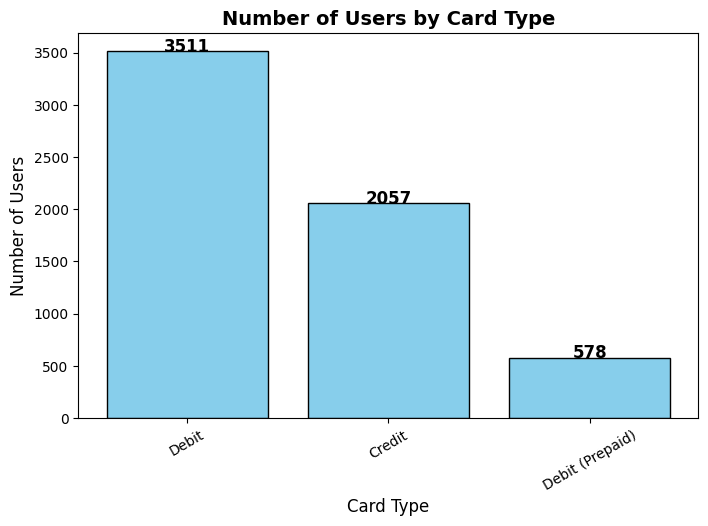

In [286]:
# Count occurrences of each card type
card_type_counts = (
    df_cards
    .group_by("card_type")
    .agg(ps.len().alias("count"))
    .sort("count", descending=True)
)

# Extract labels and values for plotting
card_types = card_type_counts["card_type"].to_list()
counts = card_type_counts["count"].to_list()

# Plot the bar chart
plt.figure(figsize=(8, 5))
plt.bar(card_types, counts, color="skyblue", edgecolor="black")

# Add labels and title
plt.xlabel("Card Type", fontsize=12)
plt.ylabel("Number of Users", fontsize=12)
plt.title("Number of Users by Card Type", fontsize=14, fontweight="bold")

# Annotate bars with counts
for i, count in enumerate(counts):
    plt.text(i, count + 0.1, str(count), ha="center", fontsize=12, fontweight="bold")

# Show the plot
plt.xticks(rotation=30)
plt.show()


3. **Pie Chart of Card Brand Distribution**  
   - Proportion of different card brands in the dataset.

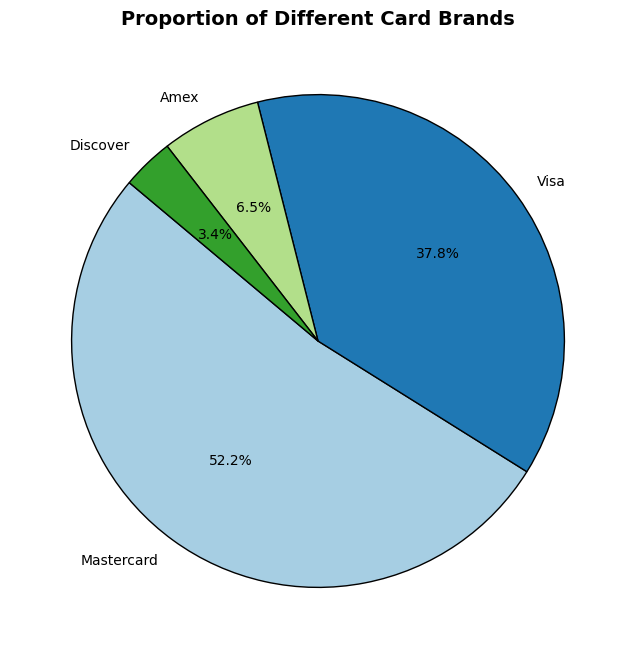

In [287]:
# Count occurrences of each card brand
card_brand_counts = (
    df_cards
    .group_by("card_brand")
    .agg(ps.len().alias("count"))
    .sort("count", descending=True)
)

# Extract labels and values for plotting
brands = card_brand_counts["card_brand"].to_list()
counts = card_brand_counts["count"].to_list()

# Define colors for better visualization
colors = plt.cm.Paired.colors[:len(brands)]

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(counts, labels=brands, autopct="%1.1f%%", colors=colors, startangle=140, wedgeprops={'edgecolor': 'black'})

# Add title
plt.title("Proportion of Different Card Brands", fontsize=14, fontweight="bold")

# Show the plot
plt.show()

4. **Pie Chart of Card Type Distribution**  
   - Proportion of different card types (Credit, Debit, Prepaid).

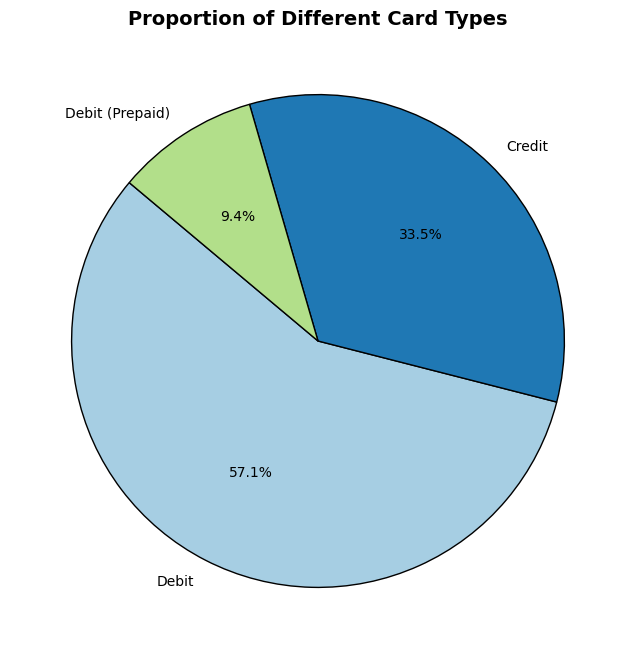

In [288]:
# Count occurrences of each card type
card_type_counts = (
    df_cards
    .group_by("card_type")
    .agg(ps.len().alias("count"))
    .sort("count", descending=True)
)

# Extract labels and values for plotting
card_types = card_type_counts["card_type"].to_list()
counts = card_type_counts["count"].to_list()

# Define colors for better visualization
colors = plt.cm.Paired.colors[:len(card_types)]

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(counts, labels=card_types, autopct="%1.1f%%", colors=colors, startangle=140, wedgeprops={'edgecolor': 'black'})

# Add title
plt.title("Proportion of Different Card Types", fontsize=14, fontweight="bold")

# Show the plot
plt.show()

5. **Histogram of Credit Limits**  
   - Distribution of **credit_limit** to see how limits vary across users.

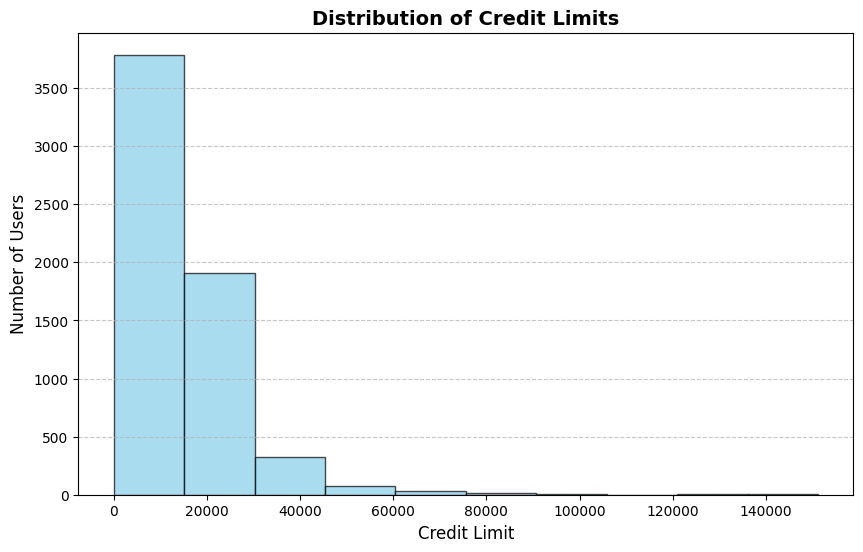

In [289]:
# Extract credit limit values
credit_limits = df_cards["credit_limit"].to_list()

# Plot the histogram
plt.figure(figsize=(10, 6))
plt.hist(credit_limits, bins=10, color="skyblue", edgecolor="black", alpha=0.7)

# Add labels and title
plt.xlabel("Credit Limit", fontsize=12)
plt.ylabel("Number of Users", fontsize=12)
plt.title("Distribution of Credit Limits", fontsize=14, fontweight="bold")

# Show the plot
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

6. **Box Plot of Credit Limits per Card Type**  
   - Compare credit limits between **credit, debit, and prepaid cards**.

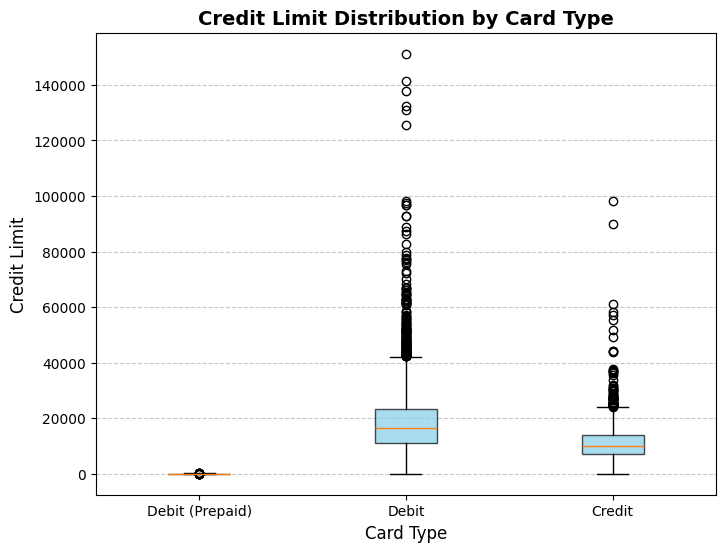

In [290]:
# Group data by card type
card_types = df_cards["card_type"].unique().to_list()
credit_limit_data = [df_cards.filter(df_cards["card_type"] == ct)["credit_limit"].to_list() for ct in card_types]

# Plot the box plot
plt.figure(figsize=(8, 6))
plt.boxplot(credit_limit_data, tick_labels=card_types, patch_artist=True, boxprops=dict(facecolor="skyblue", alpha=0.7))

# Add labels and title
plt.xlabel("Card Type", fontsize=12)
plt.ylabel("Credit Limit", fontsize=12)
plt.title("Credit Limit Distribution by Card Type", fontsize=14, fontweight="bold")

# Show the plot
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

7. **Box Plot of Credit Limits per Card Brand**  
   - Compare the **credit limit** distribution for Visa, Mastercard, etc.

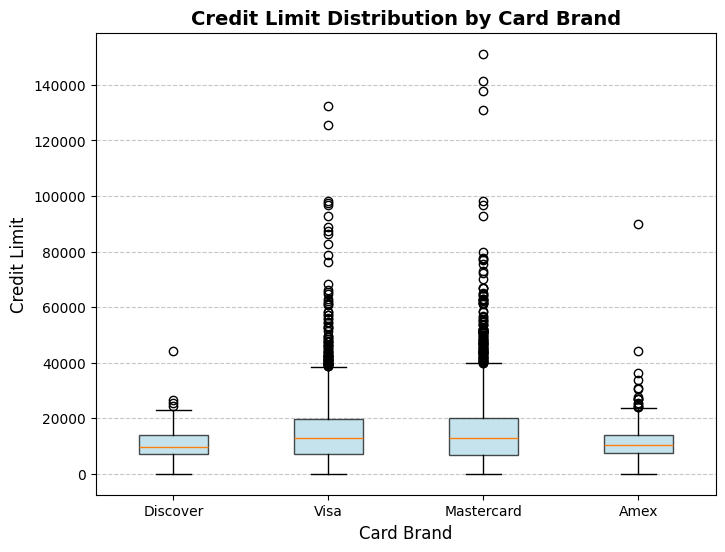

In [291]:
# Group data by card brand
card_brands = df_cards["card_brand"].unique().to_list()
credit_limit_data = [df_cards.filter(df_cards["card_brand"] == brand)["credit_limit"].to_list() for brand in card_brands]

# Plot the box plot
plt.figure(figsize=(8, 6))
plt.boxplot(credit_limit_data, tick_labels=card_brands, patch_artist=True, boxprops=dict(facecolor="lightblue", alpha=0.7))

# Add labels and title
plt.xlabel("Card Brand", fontsize=12)
plt.ylabel("Credit Limit", fontsize=12)
plt.title("Credit Limit Distribution by Card Brand", fontsize=14, fontweight="bold")

# Show the plot
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

8. **Histogram of Number of Cards Issued**  
   - Shows how many users have **one or multiple cards**.

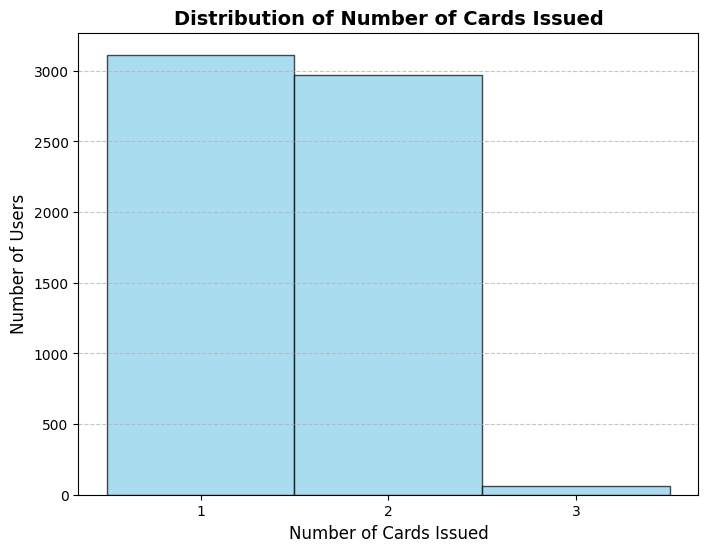

In [292]:
# Extract number of cards issued
num_cards = df_cards["num_cards_issued"].to_list()

# Plot the histogram
plt.figure(figsize=(8, 6))
plt.hist(num_cards, bins=range(1, max(num_cards) + 2), color="skyblue", edgecolor="black", alpha=0.7, align='left')

# Add labels and title
plt.xlabel("Number of Cards Issued", fontsize=12)
plt.ylabel("Number of Users", fontsize=12)
plt.title("Distribution of Number of Cards Issued", fontsize=14, fontweight="bold")

# Show the plot
plt.xticks(range(1, max(num_cards) + 1))  # Ensure ticks are at whole numbers
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

9. **Time-Series Analysis of Account Opening Dates**  
   - Line chart showing the **trend of account openings over time**.

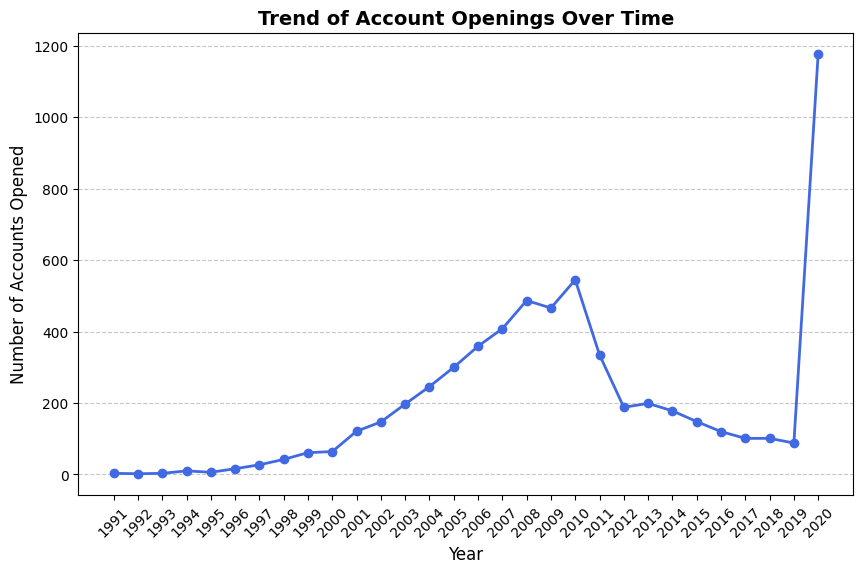

In [293]:
yearly_counts = df_cards.group_by(
   df_cards["acct_open_date"].dt.year().alias("year")
).agg(
   ps.len().alias("num_accounts")
).sort("year")
# Extract data for plotting
years = yearly_counts["year"].to_list()
num_accounts = yearly_counts["num_accounts"].to_list()

# Plot the time series line chart
plt.figure(figsize=(10, 6))
plt.plot(years, num_accounts, marker="o", linestyle="-", color="royalblue", linewidth=2)

# Add labels and title
plt.xlabel("Year", fontsize=12)
plt.ylabel("Number of Accounts Opened", fontsize=12)
plt.title("Trend of Account Openings Over Time", fontsize=14, fontweight="bold")

# Show grid and plot
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.xticks(years, rotation=45)  # Ensure all years are labeled
plt.show()


10. **Time-Series Analysis of PIN Changes**  
   - Line chart showing the **trend of year-wise PIN changes**.

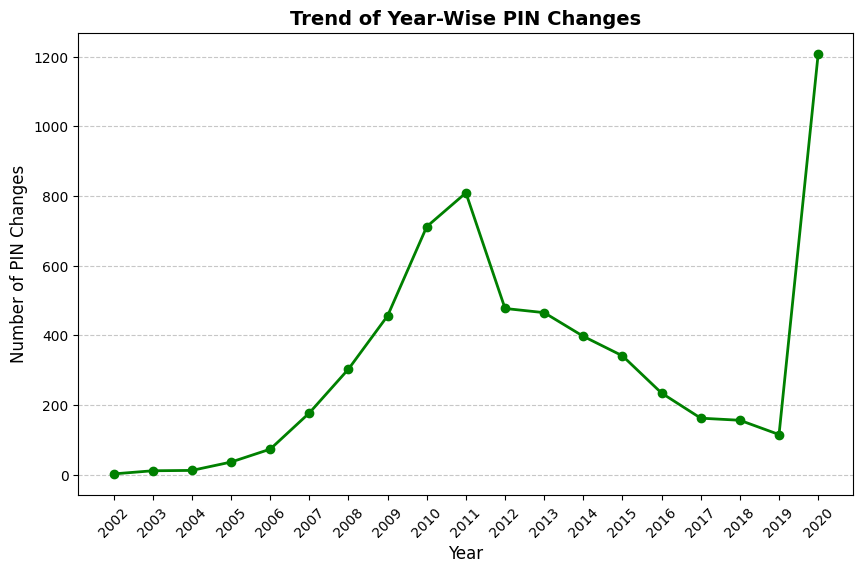

In [294]:
# Count the number of PIN changes per year
yearly_pin_changes = df_cards.group_by("year_pin_last_changed").agg(ps.len().alias("num_changes")).sort("year_pin_last_changed")

# Extract data for plotting
years = yearly_pin_changes["year_pin_last_changed"].to_list()
num_changes = yearly_pin_changes["num_changes"].to_list()

# Plot the time series line chart
plt.figure(figsize=(10, 6))
plt.plot(years, num_changes, marker="o", linestyle="-", color="green", linewidth=2)

# Add labels and title
plt.xlabel("Year", fontsize=12)
plt.ylabel("Number of PIN Changes", fontsize=12)
plt.title("Trend of Year-Wise PIN Changes", fontsize=14, fontweight="bold")

# Show grid and plot
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.xticks(years, rotation=45)  # Ensure all years are labeled
plt.show()

11. **Bar Chart of Cards Issued per Year**  
   - Number of **cards issued** each year.

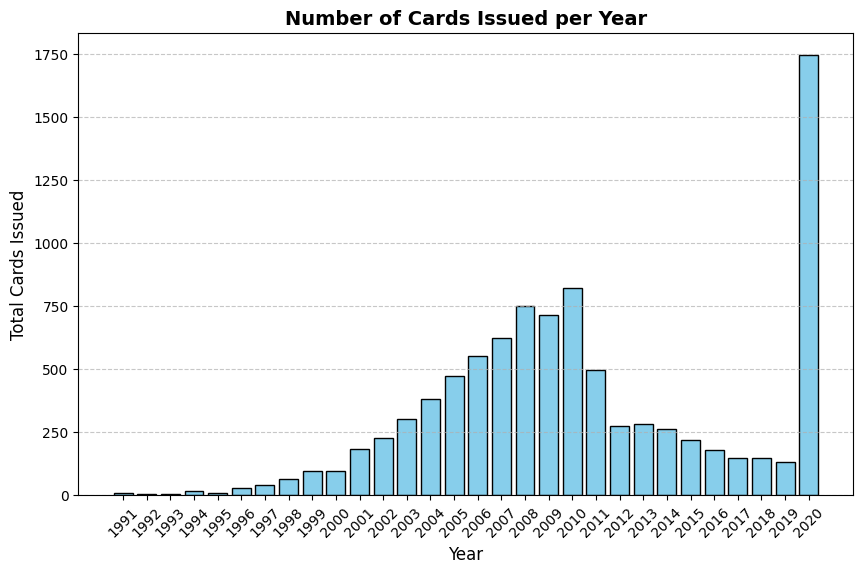

In [295]:
cards_issued_per_year = df_cards.group_by(
   df_cards["acct_open_date"].dt.year().alias("year")
).agg(
   ps.sum("num_cards_issued").alias("total_cards")
).sort("year")

# Extract data for plotting
years = cards_issued_per_year["year"].to_list()
total_cards = cards_issued_per_year["total_cards"].to_list()

# Plot the bar chart
plt.figure(figsize=(10, 6))
plt.bar(years, total_cards, color="skyblue", edgecolor="black")

# Add labels and title
plt.xlabel("Year", fontsize=12)
plt.ylabel("Total Cards Issued", fontsize=12)
plt.title("Number of Cards Issued per Year", fontsize=14, fontweight="bold")

# Show grid and plot
plt.xticks(years, rotation=45)  # Ensure all years are labeled
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()


12. **Scatter Plot of Account Opening Date vs. Credit Limit**  
   - See if older accounts have **higher credit limits**.

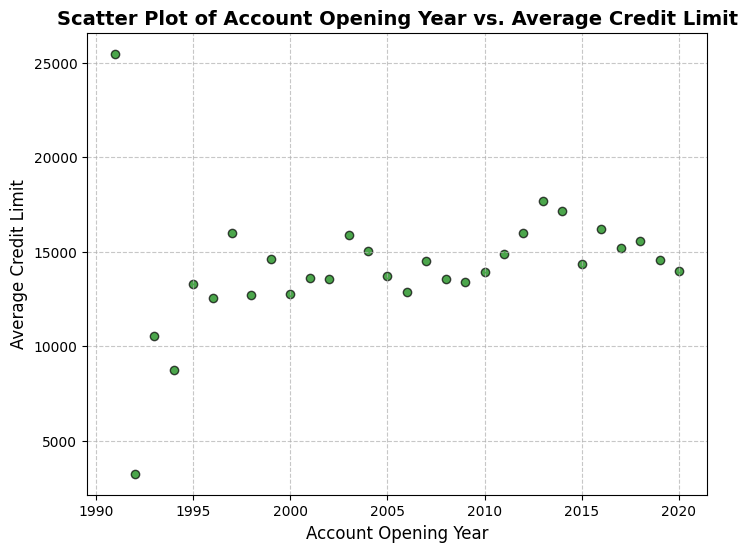

In [296]:
# Group data by the year extracted from 'acct_open_date' and aggregate credit limits
credit_limits_by_year = df_cards.group_by(
   df_cards["acct_open_date"].dt.year().alias("year_opened")
).agg(
   ps.col("credit_limit").mean().alias("average_credit_limit")
).sort("year_opened")

# Extract data for plotting
years_opened = credit_limits_by_year["year_opened"].to_list()
average_credit_limits = credit_limits_by_year["average_credit_limit"].to_list()

# Plot the scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(years_opened, average_credit_limits, color="green", edgecolors="black", alpha=0.7)

# Add labels and title
plt.xlabel("Account Opening Year", fontsize=12)
plt.ylabel("Average Credit Limit", fontsize=12)
plt.title("Scatter Plot of Account Opening Year vs. Average Credit Limit", fontsize=14, fontweight="bold")

# Show grid and plot
plt.grid(True, linestyle="--", alpha=0.7)
plt.show()


13. **Stacked Bar Chart: Card Expiry Trends by Year**  
   - Number of cards expiring in each year.

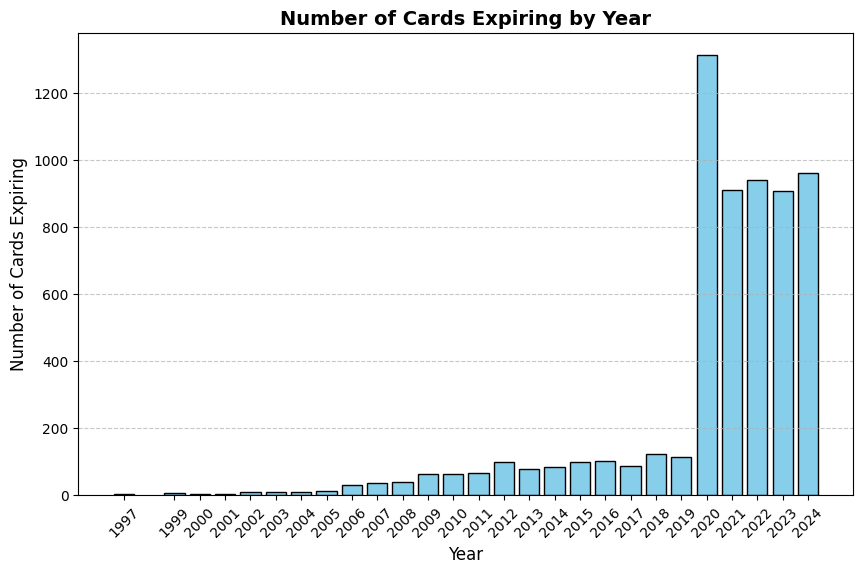

In [297]:
# Extract year from 'expires' column
df_cards = df_cards.with_columns(ps.col("expires").str.extract(r"(\d{4}$)").cast(ps.Int64).alias("expiry_year"))

# Count the number of cards expiring each year
expiry_counts = df_cards.group_by("expiry_year").agg(ps.len().alias("num_cards")).sort("expiry_year")

# Extract data for plotting
years = expiry_counts["expiry_year"].to_list()
num_cards = expiry_counts["num_cards"].to_list()

# Plot the stacked bar chart
plt.figure(figsize=(10, 6))
plt.bar(years, num_cards, color="skyblue", edgecolor="black")

# Add labels and title
plt.xlabel("Year", fontsize=12)
plt.ylabel("Number of Cards Expiring", fontsize=12)
plt.title("Number of Cards Expiring by Year", fontsize=14, fontweight="bold")

# Show grid and plot
plt.xticks(years, rotation=45)  # Ensure all years are labeled
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()


14. **Count of Cards with and without Chip**  
   - Bar chart of how many cards have a **chip vs. no chip**.

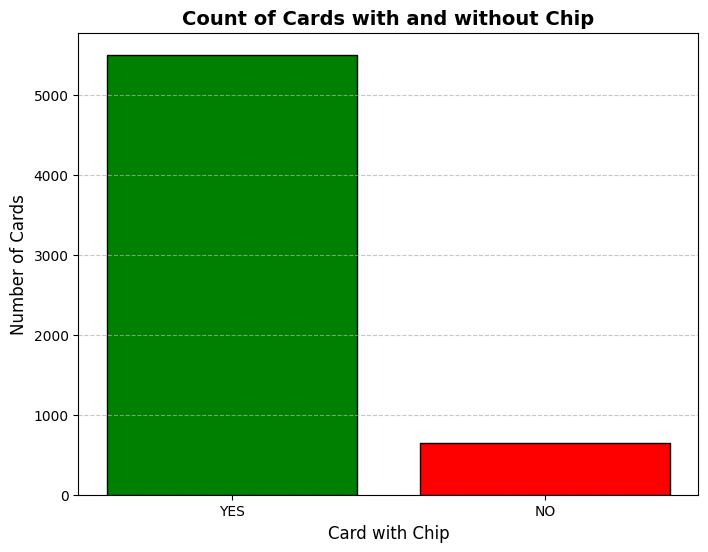

In [298]:
# Count the number of cards with and without chip
chip_counts = df_cards.group_by("has_chip").agg(ps.len().alias("num_cards"))

# Extract data for plotting
chip_labels = chip_counts["has_chip"].to_list()
num_cards = chip_counts["num_cards"].to_list()

# Plot the bar chart
plt.figure(figsize=(8, 6))
plt.bar(chip_labels, num_cards, color=["green", "red"], edgecolor="black")

# Add labels and title
plt.xlabel("Card with Chip", fontsize=12)
plt.ylabel("Number of Cards", fontsize=12)
plt.title("Count of Cards with and without Chip", fontsize=14, fontweight="bold")

# Show grid and plot
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

### **Numerical Analysis**

1. **Descriptive Statistics**  

In [299]:
df_cards.describe()

statistic,id,client_id,card_brand,card_type,card_number,expires,cvv,has_chip,num_cards_issued,credit_limit,acct_open_date,year_pin_last_changed,expiry_year
str,f64,f64,str,str,f64,str,f64,str,f64,f64,str,f64,f64
"""count""",6146.0,6146.0,"""6146""","""6146""",6146.0,"""6146""",6146.0,"""6146""",6146.0,6146.0,"""6146""",6146.0,6146.0
"""null_count""",0.0,0.0,"""0""","""0""",0.0,"""0""",0.0,"""0""",0.0,0.0,"""0""",0.0,0.0
"""mean""",3072.5,994.939636,null,null,4.8204e15,null,506.220794,null,1.503091,14347.49398,"""2011-01-15 12:55:31.727000""",2013.436707,2020.330784
"""std""",1774.341709,578.614626,null,null,1.3286e15,null,289.431123,null,0.519191,12014.463884,null,4.270699,3.958049
"""min""",0.0,0.0,"""Amex""","""Credit""",3.0011e14,"""01/2002""",0.0,"""NO""",1.0,0.0,"""1991-01-01""",2002.0,1997.0
"""25%""",1536.0,492.0,null,null,4.4856e15,null,257.0,null,1.0,7030.0,"""2006-10-01""",2010.0,2020.0
"""50%""",3073.0,992.0,null,null,5.1093e15,null,517.0,null,1.0,12594.0,"""2010-03-01""",2013.0,2021.0
"""75%""",4609.0,1495.0,null,null,5.5852e15,null,756.0,null,2.0,19158.0,"""2016-05-01""",2017.0,2023.0
"""max""",6145.0,1999.0,"""Visa""","""Debit (Prepaid)""",6.9972e15,"""12/2024""",999.0,"""YES""",3.0,151223.0,"""2020-02-01""",2020.0,2024.0


2. **Correlation Analysis**  
   - Check correlation between **credit_limit, num_cards_issued, and acct_open_date**.

In [300]:
df_selected = df_cards.select([
    ps.col("credit_limit"),
    ps.col("num_cards_issued"),
    ps.col("acct_open_date").dt.year().alias("acct_open_date_numeric")
])

df_selected.corr()


credit_limit,num_cards_issued,acct_open_date_numeric
f64,f64,f64
1.0,-0.084688,0.018764
-0.084688,1.0,-0.042316
0.018764,-0.042316,1.0


3. **Credit Limit Analysis per Card Brand**  
   - Find the **average credit limit per card brand**.

In [301]:
# Group by 'card_brand' and calculate the mean of 'credit_limit'
avg_credit_limit_per_brand = df_cards.group_by("card_brand").agg(
    ps.col("credit_limit").mean().alias("avg_credit_limit")
)
# Collect the results into a list of dictionaries
avg_credit_limit_list = avg_credit_limit_per_brand.to_dicts()

# Print the results
for row in avg_credit_limit_list:
    print(row)


{'card_brand': 'Amex', 'avg_credit_limit': 11436.3184079602}
{'card_brand': 'Mastercard', 'avg_credit_limit': 14659.600186974136}
{'card_brand': 'Visa', 'avg_credit_limit': 14737.334909716252}
{'card_brand': 'Discover', 'avg_credit_limit': 10816.267942583732}


4. **Credit Limit Analysis per Card Type**  
   - Find the **average credit limit per card type**.

In [302]:
# Group by 'card_brand' and calculate the mean of 'credit_limit'
avg_credit_limit_per_brand = df_cards.group_by("card_type").agg(
    ps.col("credit_limit").mean().alias("avg_credit_limit")
)
# Collect the results into a list of dictionaries
avg_credit_limit_list = avg_credit_limit_per_brand.to_dicts()

# Print the results
for row in avg_credit_limit_list:
    print(row)


{'card_type': 'Debit (Prepaid)', 'avg_credit_limit': 64.44809688581314}
{'card_type': 'Credit', 'avg_credit_limit': 11174.380165289256}
{'card_type': 'Debit', 'avg_credit_limit': 18557.88863571632}


5. **Percentage of Cards with Chip vs. No Chip**  
   - Find out how many users still use **non-chip cards**.

In [303]:
non_chip_cards = df_cards.filter(ps.col("has_chip") == "NO")
num_non_chip_cards = non_chip_cards.height
total_cards = df_cards.height
percentage_non_chip = (num_non_chip_cards / total_cards) * 100
percentage_non_chip

10.510901399284087

6. **Client-Level Analysis**  
   - Find the **average number of cards per client**.

In [304]:
cards_per_client = df_cards.group_by("client_id").agg(ps.len().alias("num_cards"))
# Calculate the average number of cards per client
average_cards_per_client = cards_per_client["num_cards"].mean()
average_cards_per_client

3.073

7. **Oldest and Newest Accounts**  
   - Find the **oldest and most recent** account opening dates.

In [305]:
oldest_account_date = df_cards["acct_open_date"].min()
newest_account_date = df_cards["acct_open_date"].max()
oldest_account_date, newest_account_date

(datetime.date(1991, 1, 1), datetime.date(2020, 2, 1))